In [ ]:
# Simple Linear Regression
# 08.04.2020
# Based on: Machine Learning A-Z™: Hands-On Python & R In Data Science - Udemy
# By: Kristijan Aleksoski

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 500)

In [8]:
# Importing the dataset
dataset_march = pd.read_csv('infected_1-31.csv')

In [217]:
#Extending period
#Creating April dataframe
lst=list(range(32,62))
lst2=([''] * 31)
dataset_april = pd.DataFrame(list(zip(lst, lst2)), columns =['day', 'infected'], index=range(31,61)) 

#Concatenating
frames = [dataset_march, dataset_april]
dataset = pd.concat(frames)

In [91]:
X = dataset.iloc[:31, :-1].values
y = dataset.iloc[:31, 1].values

In [3]:
#Taking care of missing data
"""from sklearn.impute import SimpleImputer
missingvalues = SimpleImputer(missing_values = np.nan, strategy = 'mean', verbose = 0)
missingvalues = missingvalues.fit(X[:31, 1:3])
X[:31, 1:3]=missingvalues.transform(X[:, 1:3])"""

"from sklearn.impute import SimpleImputer\nmissingvalues = SimpleImputer(missing_values = np.nan, strategy = 'mean', verbose = 0)\nmissingvalues = missingvalues.fit(X[:31, 1:3])\nX[:31, 1:3]=missingvalues.transform(X[:, 1:3])"

In [5]:
# Encoding categorical data
# Encoding the Independent Variable
"""from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)"""

'from sklearn.preprocessing import LabelEncoder, OneHotEncoder\nlabelencoder_X = LabelEncoder()\nX[:, 0] = labelencoder_X.fit_transform(X[:, 0])\nonehotencoder = OneHotEncoder(categorical_features = [0])\nX = onehotencoder.fit_transform(X).toarray()\n# Encoding the Dependent Variable\nlabelencoder_y = LabelEncoder()\ny = labelencoder_y.fit_transform(y)'

In [2]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

In [15]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

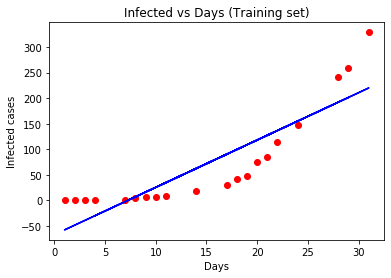

In [19]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Infected vs Days (Training set)')
plt.xlabel('Days')
plt.ylabel('Infected cases')
plt.show()

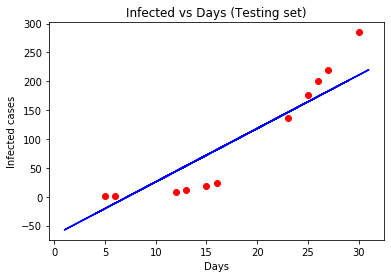

In [283]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Infected vs Days (Testing set)')
plt.xlabel('Days')
plt.ylabel('Infected cases')
plt.show()

In [207]:
#coef_ : array, shape (n_features, ) or (n_targets, n_features)
b1=regressor.coef_
#intercept_ : array  Independent term in the linear model.
b0=regressor.intercept_
print(b0)
print(b1)

-66.89090143218198
[9.25442291]


In [206]:
#Defining prediction function
def regressionline(x):
    y = b0+b1*x
    return y

In [281]:
#Prediction of April cases
X_april = dataset.iloc[31:61, :-1].values
y_pred_april = np.array([regressionline(x) for x in X_april])
y_pred_march= np.array([regressionline(x) for x in X]) #for visualisation purposes

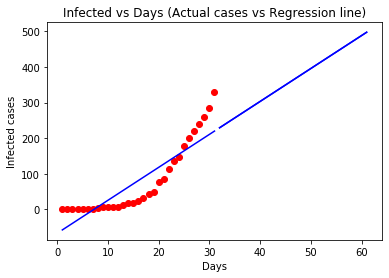

In [282]:
# Visualising Actual cases vs Regression line
plt.scatter(X, y, color = 'red')
plt.plot(X_april, y_pred_april, color = 'blue')
plt.plot(X_april, y_pred_april, color = 'blue')
plt.plot(X, x_pred_march, color = 'blue')
plt.title('Infected vs Days (Actual cases vs Regression line)')
plt.xlabel('Days')
plt.ylabel('Infected cases')
plt.show()

In [278]:
#Concatenating
frames1 = [X_april, y_pred_april]
dataset_april_predicted = np.concatenate(frames1, axis=1)

In [278]:
#Showing table of predicted cases for April, daily
dataset_april_predicted

array([[ 32.        , 229.25063184],
       [ 33.        , 238.50505476],
       [ 34.        , 247.75947767],
       [ 35.        , 257.01390059],
       [ 36.        , 266.2683235 ],
       [ 37.        , 275.52274642],
       [ 38.        , 284.77716933],
       [ 39.        , 294.03159225],
       [ 40.        , 303.28601516],
       [ 41.        , 312.54043808],
       [ 42.        , 321.79486099],
       [ 43.        , 331.04928391],
       [ 44.        , 340.30370682],
       [ 45.        , 349.55812974],
       [ 46.        , 358.81255265],
       [ 47.        , 368.06697557],
       [ 48.        , 377.32139848],
       [ 49.        , 386.5758214 ],
       [ 50.        , 395.83024431],
       [ 51.        , 405.08466723],
       [ 52.        , 414.33909014],
       [ 53.        , 423.59351306],
       [ 54.        , 432.84793597],
       [ 55.        , 442.10235889],
       [ 56.        , 451.3567818 ],
       [ 57.        , 460.61120472],
       [ 58.        , 469.86562763],
 

In [277]:
np.savetxt("infected_prediction_April.csv", dataset_april_predicted, fmt='%.2d', delimiter=",")